In [1]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import *
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.linear_model import *


df = load_df()

print(df)

2024-06-08 15:23:38.102 | INFO     | tweedejaars_project.config:<module>:11 - PROJ_ROOT path is: /home/sakr/tweedejaars_project


                        datetime  import_capacity  upward_dispatch_published  \
0      2023-12-29 00:00:00+00:00             65.4                        0.0   
1      2023-12-29 00:01:00+00:00             65.4                        0.0   
2      2023-12-29 00:02:00+00:00             65.4                        0.0   
3      2023-12-29 00:03:00+00:00             65.4                        0.0   
4      2023-12-29 00:04:00+00:00             65.4                        0.0   
...                          ...              ...                        ...   
220241 2024-05-29 22:41:00+00:00           1982.6                      167.0   
220242 2024-05-29 22:42:00+00:00           1982.6                      165.0   
220243 2024-05-29 22:43:00+00:00           1982.6                      162.0   
220244 2024-05-29 22:44:00+00:00           1982.6                      158.0   
220245 2024-05-29 22:45:00+00:00           1982.6                      160.0   

        downward_dispatch_published  mi

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      3543
        True       0.00      0.00      0.00       101

    accuracy                           0.97      3644
   macro avg       0.49      0.50      0.49      3644
weighted avg       0.95      0.97      0.96      3644

Confusion Matrix:


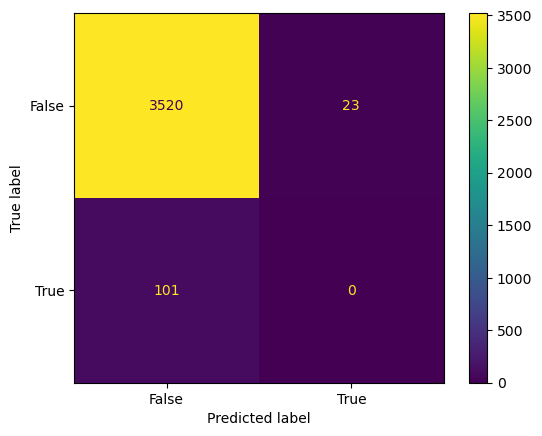

In [3]:
features = [
    "import_capacity",
    "settlement_price_bestguess",
]

splits = get_splits(df, ['PTU', 'import_capacity'], return_dict_pair=False)

train_x = splits['train'][0]
train_y = splits['train'][1]

test_x = splits['test'][0]
test_y = splits['test'][1]
ids = splits['test'][2]

# Initialize the Decision Tree Classifier
clf = HistGradientBoostingClassifier()

# Train the classifier
clf.fit(train_x, train_y)

y_pred = clf.predict(test_x)

show_basic_metrics(test_y, y_pred, ids)


In [ ]:
# def compute_penalty(df, pred, ids):
#     total_penalty = 0

#     pred_df = pd.DataFrame({
#         "ptu_id": ids,
#         "target_two_sided_ptu_pred": pred
#     })
    
#     df = df.set_index("ptu_id")
#     pred_df = pred_df.set_index("ptu_id")
    
#     df["target_two_sided_ptu_pred"] = pred_df["target_two_sided_ptu_pred"]

#     df = df.reset_index()

#     grouped = df.groupby("ptu_id")

#     for _, job_df in grouped:
#         if job_df['target_two_sided_ptu'].any():
#             count = 0
#             positive_found = False

#             job_df = job_df.reset_index(drop=True)

#             for _, row in job_df.iloc[2:].iterrows():
#                 min_price = row["min_price_published"]
#                 max_price = row["max_price_published"]

#                 if min_price < 0 and not positive_found:
#                     count += 1

#                 if row['target_two_sided_ptu']:
#                     if min_price < 0 and not positive_found:
#                         count -= 1

#                 if pd.notna(max_price) and max_price > 0:
#                     positive_found = True

#             max_price = job_df["max_price_published"].max()
#             if pd.notna(max_price):
#                 penalty = ((100 / 60) * max_price).round(-1) * count
#                 total_penalty += penalty

#     return total_penalty

# def compute_reward(df, pred, ids):
#     total_reward = 0

#     pred_df = pd.DataFrame({
#         "ptu_id": ids,
#         "target_two_sided_ptu_pred": pred
#     })
    
#     df = df.set_index("ptu_id")
#     pred_df = pred_df.set_index("ptu_id")
    
#     df["target_two_sided_ptu_pred"] = pred_df["target_two_sided_ptu_pred"]

#     df = df.reset_index()

#     grouped = df.groupby("ptu_id")

#     for _, job_df in grouped:
#         if not job_df['target_two_sided_ptu'].any():

#             job_df = job_df.reset_index(drop=True)

#             if pd.notna(max_price):
#                 reward = ((100 / 60) * min_price).round(-1) * count
#                 total_reward += reward

#     return total_reward

# compute_penalty(df, df['target_two_sided_ptu'], df['ptu_id'])

In [ ]:
# def flatten_ptu(true, pred, ids):
#     # Concatenate the true, pred, and ids into a single DataFrame
#     base = pd.concat([pd.Series(true), pd.Series(pred), pd.Series(ids)], axis=1, ignore_index=True)
#     base.columns = ["target_two_sided_ptu", "target_two_sided_ptu_pred", "ptu_id"]

#     # Group by the ptu_id and aggregate the true and pred values
#     # Here we assume you want to flatten using some kind of aggregation, like mean
#     df = base.groupby("ptu_id").agg({
#         "target_two_sided_ptu": "any",
#         "target_two_sided_ptu_pred": "any"
#     }).reset_index()

#     return df

# def basic_metrics(true, pred, ids, flatten=True):
#     if flatten:
#         flattened = flatten_ptu(true, pred, ids)
#         test_y = flattened['target_two_sided_ptu']
#         y_pred = flattened['target_two_sided_ptu_pred']
    
#     accuracy = accuracy_score(true, pred)
#     print(accuracy)
    
#     print("Classification Report:")
#     print(classification_report(true, pred))
    
#     # Print the confusion matrix
#     print("Confusion Matrix:")
#     ConfusionMatrixDisplay.from_predictions(true, pred)
#     plt.show()
        


# basic_metrics(test_y, y_pred, ids, flatten=False)


In [ ]:
# data = {
#     'Time': [
#         '11:30', '11:31', '11:32', '11:33', '11:34', '11:35', '11:36', 
#         '11:37', '11:38', '11:39', '11:40', '11:41', '11:42', '11:43', 
#         '11:44', '11:45'
#     ],
#     'min_price_published': [
#         -100, np.NaN, 0, -100, -150, 
#         -200, -300, -100, np.NaN, np.NaN, 
#         np.NaN, np.NaN, np.NaN, -30, -100, 0
#     ],
#     'max_price_published': [
#         np.NaN, 20, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 
#         40, 50, 90, 200, 80, 
#         np.NaN, np.NaN, np.NaN
#     ],
#     'target_two_sided_ptu': [
#         True, False, False, True, True, False, False, True, False, False,
#          False, False, False, False, False, False
#     ],
#     'ptu_id':
#     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# }

# df = pd.DataFrame(data)


# compute_penalty(df, df['target_two_sided_ptu'], df['ptu_id'])